In [1]:
import pandas as pd
import json
import re

In [2]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [3]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [4]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [22]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ']]
    return text

In [23]:
# apply the clean_text function to the dataframe
df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [24]:
df.head()

,title,comment,doc,length,sentiment,subjectivity
0,[kid],"[pepe, body]","( , pepe, body, )",4,0.0,0.00
1,[kid],"[https, www, youtube, com, watch, v, nf, k, y,...","( , https, , www, youtube, com...",13,0.0,0.00
2,[kid],"[don, t, richard, spencer, tier, control, oppo...","( , don, , t, like, richar...",18,0.2,0.30
3,[kid],"[wonder, ole, brain, imagery, quot, meme, quot...","( , wonder, big, ole, brain, agre...",25,-0.1,0.45
4,[kid],"[vatnigger, meat, grinder]","( , vatnigger, meat, grinder)",4,0.0,0.00


In [27]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [29]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

ValueError: [E007] 'spacytextblob' already exists in pipeline. Existing names: ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner', 'spacytextblob']

In [31]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

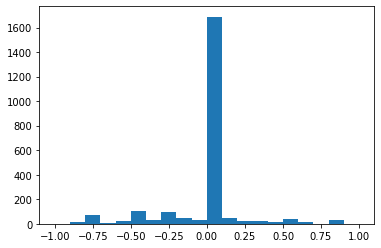

In [32]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=20)
plt.show()

In [33]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
1695,"[omg, omg, elon, hecke, baaaaasedbased, base, ...","[kangaroo, shitskinmusk, base]","( , kangaroo, eat, shitskinmusk,...",3,-0.8,1.000000
2075,"[company, ground, superior, ashkenazi, iq]","[decision, retard, agenda]","( , personal, decision, retard, ...",3,-0.9,0.683333
2109,"[wignat, fight, people]","[hate, achille, heel, empathy, animal, people,...","( , hate, , s, white, , achil...",7,-0.8,0.633333
112,"[implication, man, woman]",[base],"( , base)",1,-0.8,1.000000
1730,"[pol, goy, score]","[landlord, moron]","( , landlord, moron)",2,-0.8,1.000000


In [34]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
857,"[https, cdn, org, wsg, webm]","[laugh, point, judge, number, witness, quot, d...","( , die, laugh, point, judge, t...",30,0.55,0.166667
746,"[discussion, interpretation, bible, argument, ...","[thread, trash, win, t, thing, mouf]","( , see, thread, like, , strugg...",6,0.80,0.400000
1362,"[world, hateful, faggot, ampersand, nigger, wo...","[home, time, don, t, win]","(repent, home, time, come, don, , t, let...",5,0.80,0.700000
1811,[nigger],"[lol, man]","( , lol, , kike, big, mad, outs...",2,0.80,0.558333
1650,"[brit, france, rule, rule, day, history]","[historylol, lmao, fact]","( , opposite, literally, happen,...",3,0.60,0.500000


In [35]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['doc'].apply(lambda x: nlp(x)._.blob.subjectivity)

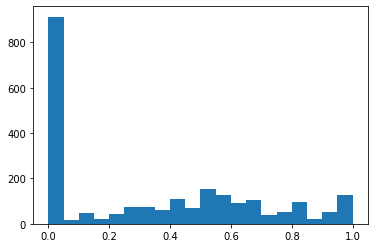

In [36]:
# lets plot the subjectivity of the comments
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [37]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
80,"[newton, bernoulli, wrong, https, www, scienti...","[journalist, clicks, quot, scientist, quot, gr...","( , journalist, write, retarde...",12,0.000000,0.800000
875,"[kanye, fire]","[ukrainians, nazi, ukrainians, larp, themwhy]","( , ukrainians, consider, subhum...",5,0.000000,0.800000
1849,"[culture, war]","[m, year, censorship, jobeveryone, half, chink...","( , want, , m, year, censorsh...",9,-0.166667,0.583333
1982,"[move, nishinoshima, breed, dog, import, japan...","[mean, hope, man, idea, history, jap, ghost, m...","( , mean, hope, go, man, , chas...",9,-0.312500,0.793750
1854,"[study, conduct, t, state, art, nano, brain, r...","[tranny, lmao]","(m, tranny, lmao)",2,0.600000,1.000000


In [38]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
548,[],"[nigcel, problem]","(nigcel, problem)",2,0.0,0.0
589,"[don, t, border, border, myth, publishing, lob...","[t, fall, publisher, propaganda]","( , t, believe, fall, publi...",4,-0.1,0.1
1536,"[https, twitter, com, adl, status]","[t, noticing]","( , isn, , t, , reve...",2,0.0,0.0
427,[day],"[haven, t, chinese, crispr, troop, target, bio...","( , haven, t, get, chinese, crisp...",10,0.0,0.0
593,"[society, propaganda, direction, script, plan]","[star, david, column]","( , star, david, column)",3,0.0,0.0


In [39]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

TypeError: sequence item 0: expected str instance, list found

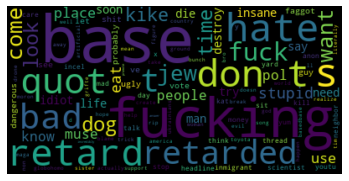

<Figure size 1440x720 with 0 Axes>

In [ ]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())